In [1]:
import networkx as nx
import pandas as pd
from venn import venn

In [2]:
data = {
    'ctrl' : None, 
    'stagei' : None, 
    'stageii' : None, 
    'stageiii': None, 
    'stageiv': None
}

In [3]:
for key in data:
    fname = '../Output/MI/expr-all-' + key + '-1e4-genmirna.tsv'
    data[key] = pd.read_csv(fname, sep='\t')

In [32]:
redes = dict.fromkeys(data)
in_degrees = dict.fromkeys(data)
for key in redes:
    redes[key] = nx.from_pandas_edgelist(df=data[key], source='Source', target='Target', 
                                         edge_attr='MI', create_using=nx.DiGraph(),)
    lista = list(redes[key].in_degree())
    in_degrees[key] = sorted(lista, key=lambda tup: tup[1], reverse=True)[:10]
in_degrees_vals = {}
for key in in_degrees:
    in_degrees_vals[key] = [ x[1] for x in in_degrees[key] ]
df = pd.DataFrame.from_dict(in_degrees_vals)
# print(df.to_latex(index=False))
df

,ctrl,stagei,stageii,stageiii,stageiv
0,240,151,58,77,93
1,216,147,51,66,87
2,215,129,46,65,67
3,209,119,44,62,56
4,146,107,44,60,55
5,140,96,43,57,54
6,125,92,43,54,49
7,119,84,42,53,46
8,114,80,42,50,45
9,110,79,40,50,44


<AxesSubplot:>

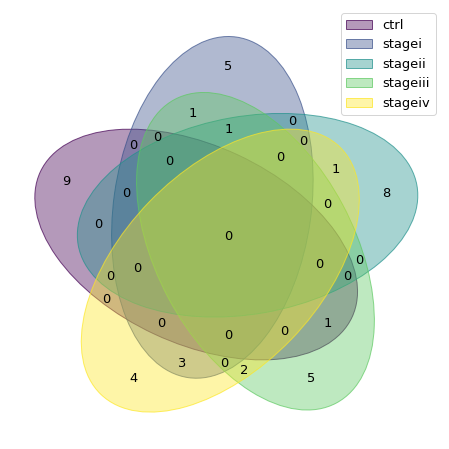

In [35]:
df = {}
for key in in_degrees:
    df[key] = { x[0] for x in in_degrees[key] }
# df1 = pd.DataFrame.from_dict(df1)
venn(df)

In [6]:
from venn import generate_petal_labels, generate_petal_sets

ctrl 490
stagei 493
stageii 494
stageiii 494
stageiv 494
01111:  {'HSA-MIR-2110', 'HSA-MIR-4326', 'HSA-MIR-486-3P', 'HSA-MIR-26A-2-3P'}
10111:  {'HSA-MIR-3928-3P'}


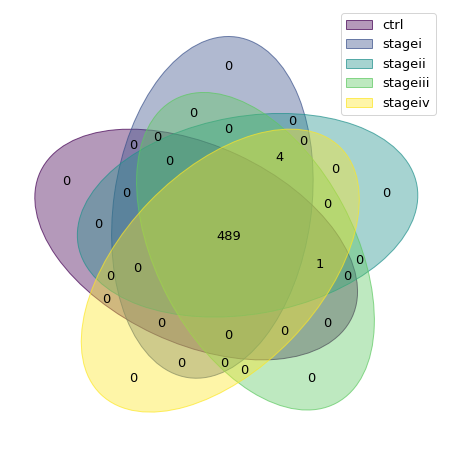

In [36]:
df = {}
for red in redes:
    nodos = list(redes[red].nodes)
    nodos = [n for n in nodos if n.startswith('HSA-') ]
    print(red, len(nodos))
    df[red] = {x for x in nodos}
venn(df)
petal_sets = generate_petal_sets(df2.values())
for petal in petal_sets:
    if len(petal_sets[petal]) < 10 and len(petal_sets[petal]) > 0:
        print(petal + ": ", petal_sets[petal])